<a href="https://colab.research.google.com/github/mahananda123/Data_Processing_and_Manipulation/blob/main/Statistical_Outlier_Detection_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Statistical Outlier Detection-IQR
We know that IQR is Q3 - Q1, and we can set the lower and upper bound by Q1 - 1.5IQR and Q3 + 1.5IQR. Boxplot automatically draws the lower/upper bound for us. We can also detect the data by deDning a function.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Nov2Temp.csv')
df.head()

,high,low
0,58,25
1,26,11
2,53,24
3,60,37
4,67,42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   high    118 non-null    int64
 1   low     118 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [4]:
df.describe()

,high,low
count,118.000000,118.000000
mean,56.830508,29.262712
std,17.205796,12.877084
min,15.000000,-33.000000
25%,48.250000,24.000000
50%,57.500000,31.000000
75%,66.750000,36.750000
max,127.000000,54.000000


In [6]:
df.shape

(118, 2)

<Axes: >

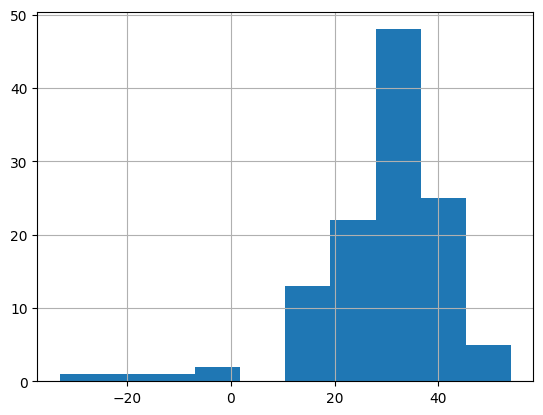

In [7]:
df['low'].hist()

<Axes: >

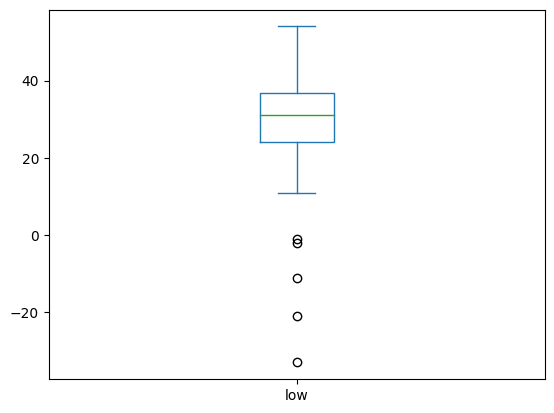

In [8]:
df['low'].plot(kind='box')

In [12]:
low_IQR=df['low'].quantile(0.75)-df['low'].quantile(0.25)
low_low_limit=df['low'].quantile(0.25)-1.5*low_IQR
low_low_limit

4.875

In [13]:

low_high_limit=df['low'].quantile(0.75)+1.5*low_IQR
low_high_limit

55.875

In [15]:
df[df['low']<low_low_limit]

,high,low
41,41,-2
79,18,-1
109,48,-11
110,43,-21
111,64,-33


In [17]:
df[df['low']>low_high_limit]

,high,low


###Remove Outliers

In [18]:
df.drop(df[df['low']<low_low_limit].index,inplace=True)

In [19]:
df.drop(df[df['low']>low_high_limit].index,inplace=True)

###Check Results

<Axes: >

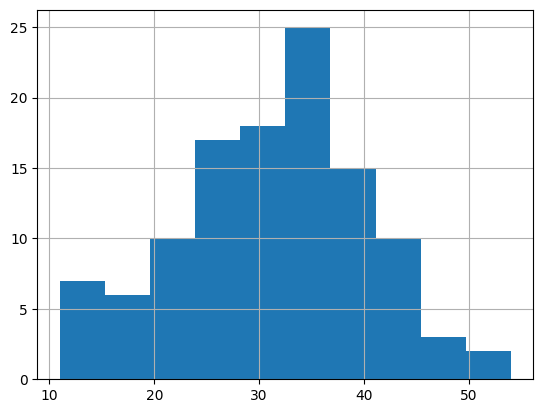

In [20]:
df['low'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c5270cbdb40>,
 'caps': [<matplotlib.lines.Line2D at 0x7c5270cbc310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5270cbeb90>],
 'medians': [<matplotlib.lines.Line2D at 0x7c5270cbf700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c5270cbde70>],
 'means': []}

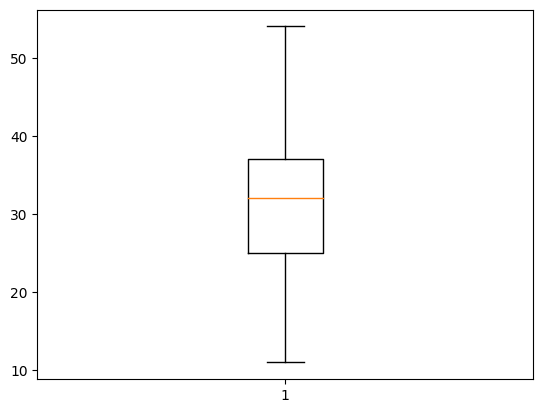

In [21]:
plt.boxplot(df['low'])

<Axes: >

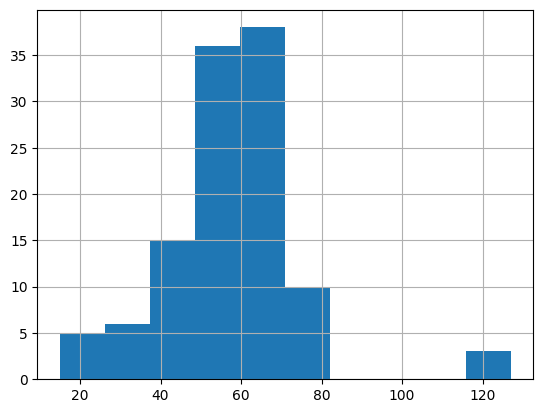

In [22]:
df['high'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c5270c187f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c5270c1a380>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5270c1bf40>],
 'medians': [<matplotlib.lines.Line2D at 0x7c5270c1b670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c5270c18280>],
 'means': []}

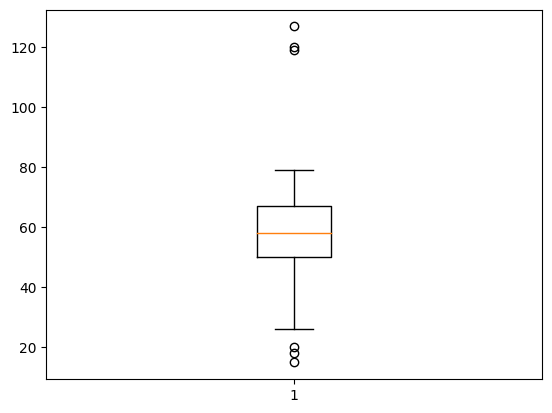

In [23]:
plt.boxplot(df['high'])

In [24]:
high_IQR=df['high'].quantile(0.75)-df['high'].quantile(0.25)
high_low_limit=df['high'].quantile(0.25)-1.5*high_IQR
high_low_limit

24.5

In [26]:
high_high_limit=df['high'].quantile(0.75)+1.5*high_IQR
high_high_limit

92.5

In [27]:
df[df['high']<high_low_limit]

,high,low
25,20,15
115,18,38
116,15,51


In [31]:
df[df['high']>high_high_limit]

,high,low
112,120,37
113,119,33
114,127,27


In [32]:
df.drop(df[df['high']<high_low_limit].index,inplace=True)

In [33]:
df.drop(df[df['high']>high_high_limit].index,inplace=True)

<Axes: >

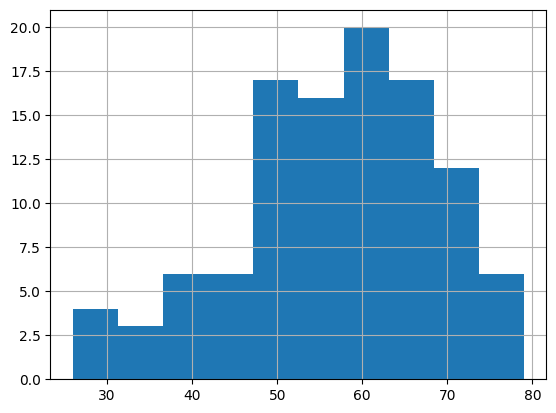

In [34]:
df['high'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c5270d650c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c5270d65600>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5270d64e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7c5270d67700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c5270d67460>],
 'means': []}

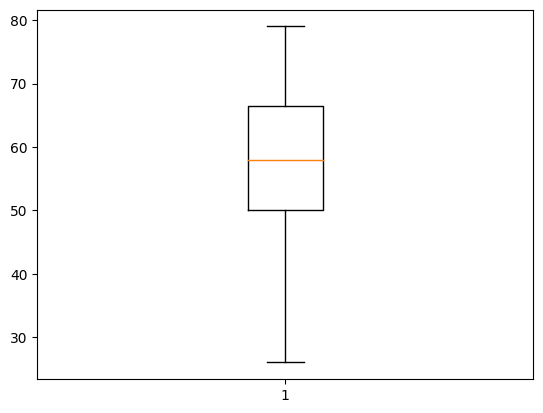

In [35]:
plt.boxplot(df['high'])